In [1]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
from spacy.tokens import Span

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [2]:
candidate_sentences = pd.read_csv("wiki_sentences_v2.csv")
candidate_sentences.shape

(4318, 1)

In [3]:
def get_entities(sent):
    ent1=""
    ent2=""
    prv_tok_dep ="" #문장에서 직전 토큰의 의존 파싱 태구
    prv_tok_text="" #문장에서 직전 토큰 
    prefix=""
    modifier = ""
    for tok in nlp(sent):
        #토큰이 구두점 (punctuation mark)이면 다음 토큰으로 이동
        if tok.dep_ !="punct":
            if tok.dep_ =="compound" : #토큰이 복합어인경우 
                prefix = tok.text
                if prv_tok_dep  =="compound" : #직전 토큰이 복합어이면 현재 토큰과 결합
                    prefix = prv_tok_text+" "+tok.text
            if tok.dep_.endswith("mod") == True: #토큰이 수식어(modifier) 인경우
                modifier = tok.text
                if prv_tok_dep  =="compound" : #직전 토큰이 수식어이면 현재 토큰을 결합
                    modifier = prv_tok_text + " "+tok.text
                    
            if tok.dep_.find("subj") == True :#주어(subject)인 경우
                ent1 = modifier+" "+prefix + " "+tok.text #수식어와 현재 토큰 결합 =>개체명 생성
                prefix=""
                modifier = ""
                prv_tok_dep = ""
                prv_tok_text = ""
            if tok.dep_.find("obj") == True: #목적어인 경우
                ent2 = modifier+" "+prefix+" "+tok.text #수식어와 현재 토큰 결합 => 개체명 생성
            
            prv_tok_dep = tok.dep_
            prv_tok_text = tok.text
    return [ent1.strip(),ent2.strip()] # 식별된 개체명 반환


In [4]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [5]:
entity_pairs =[]

for i in tqdm(candidate_sentences["sentence"]):
    entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████████| 4318/4318 [00:50<00:00, 85.80it/s]


In [6]:
entity_pairs[10:20]

[['we', 'tests'],
 ['m', 'international sales rights'],
 ['canadian musician robbie robertson', 'soundtrack'],
 ['it', 'original music tracks'],
 ['it', 'reviewed  franchise'],
 ['she', 'accidentally  mystique'],
 ['military  forces', 'arrest'],
 ['train', 'vuk'],
 ['kota eberhardt', 'telepath selene gallio'],
 ['singer', 'men']]

In [13]:
def get_relation(sent):
    doc = nlp(sent)
    matcher = Matcher(nlp.vocab)
    
    #파턴정의 
    pattern =[{'DEP':'ROOT'},
              {'DEP':'prep','OP':"?"},
              {'DEP':'agent','OP':"?"},
              {'POS':'ADJ','OP':"?"}]
    
    matcher.add("matching_1", [pattern])
    
    matches = matcher(doc)
    print('matches : ', matches)
    k = len(matches)-1
    
    span = doc[matches[k][1]:matches[k][2]]
    
    return(span.text)


In [14]:
get_relation("John completed the task")

matches :  [(11840699188806025751, 1, 2)]


'completed'

In [15]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

  0%|▏                                                                                | 8/4318 [00:00<00:58, 73.82it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]


  1%|▌                                                                               | 27/4318 [00:00<00:49, 86.66it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(118

  1%|▊                                                                               | 46/4318 [00:00<00:47, 89.14it/s]

matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]

  2%|█▏                                                                              | 66/4318 [00:00<00:48, 88.13it/s]

matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]


  2%|█▌                                                                              | 84/4318 [00:00<00:48, 87.19it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]


  2%|█▉                                                                             | 103/4318 [00:01<00:49, 84.75it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]


  3%|██▏                                                                            | 121/4318 [00:01<00:52, 80.40it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]


  3%|██▌                                                                            | 140/4318 [00:01<00:49, 84.11it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 8, 9), (11840699188806

  4%|██▉                                                                            | 160/4318 [00:01<00:46, 89.51it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 8, 9), (1184069918880602575

  4%|███▎                                                                           | 179/4318 [00:02<00:45, 91.30it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 

  5%|███▋                                                                           | 199/4318 [00:02<00:45, 89.90it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]


  5%|████                                                                           | 219/4318 [00:02<00:44, 92.40it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10

  6%|████▎                                                                          | 239/4318 [00:02<00:44, 91.76it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 0, 1)]


  6%|████▋                                                                          | 259/4318 [00:02<00:44, 90.53it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]


  6%|█████                                                                          | 278/4318 [00:03<00:48, 84.08it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


  7%|█████▎                                                                         | 288/4318 [00:03<00:46, 86.31it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10), (11840699188806025751, 8, 11)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 12, 13)]
matches : 

  7%|█████▋                                                                         | 309/4318 [00:03<00:44, 90.06it/s]

matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025

  8%|██████                                                                         | 329/4318 [00:03<00:42, 93.07it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matc

  8%|██████▍                                                                        | 349/4318 [00:03<00:44, 90.14it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (118406991888060257

  9%|██████▋                                                                        | 368/4318 [00:04<00:44, 88.34it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  

  9%|███████                                                                        | 386/4318 [00:04<00:44, 87.38it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(1184069918880602575

  9%|███████▍                                                                       | 406/4318 [00:04<00:43, 89.83it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)

 10%|███████▊                                                                       | 426/4318 [00:04<00:42, 91.68it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 10%|███████▉                                                                       | 436/4318 [00:04<00:47, 81.08it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]


 10%|████████▎                                                                      | 453/4318 [00:05<00:54, 71.32it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 32, 33)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]


 11%|████████▌                                                                      | 470/4318 [00:05<00:50, 75.62it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 21, 22)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 15, 16)]


 12%|█████████                                                                      | 497/4318 [00:05<00:46, 82.51it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 21, 22)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5

 12%|█████████▎                                                                     | 506/4318 [00:05<00:49, 77.33it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]


 12%|█████████▌                                                                     | 525/4318 [00:06<00:44, 85.24it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 5, 6)]

 13%|█████████▉                                                                     | 544/4318 [00:06<00:42, 87.89it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
mat

 13%|██████████▍                                                                    | 572/4318 [00:06<00:41, 89.46it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]


 14%|██████████▊                                                                    | 591/4318 [00:06<00:40, 92.10it/s]

matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (118

 14%|██████████▉                                                                    | 601/4318 [00:06<00:40, 92.71it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 3, 4

 14%|███████████▎                                                                   | 621/4318 [00:07<00:40, 90.95it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11

 15%|███████████▋                                                                   | 641/4318 [00:07<00:40, 89.69it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188

 15%|████████████                                                                   | 661/4318 [00:07<00:39, 92.15it/s]

matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(118406991888060

 16%|████████████▍                                                                  | 681/4318 [00:07<00:39, 91.69it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 15, 16), (11840699188806025751, 15, 17)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(118406991888

 16%|████████████▊                                                                  | 701/4318 [00:08<00:40, 89.84it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
ma

 17%|█████████████▏                                                                 | 721/4318 [00:08<00:40, 88.28it/s]

matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]


 17%|█████████████▌                                                                 | 740/4318 [00:08<00:39, 90.04it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751

 18%|█████████████▉                                                                 | 760/4318 [00:08<00:39, 89.09it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 18%|██████████████▎                                                                | 779/4318 [00:08<00:39, 89.75it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(1

 18%|██████████████▌                                                                | 797/4318 [00:09<00:39, 88.81it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 35, 36), (11840699188806025751, 35, 37)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8)]


 19%|██████████████▉                                                                | 815/4318 [00:09<00:41, 85.25it/s]

matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188

 19%|███████████████▎                                                               | 835/4318 [00:09<00:39, 87.14it/s]

matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(

 20%|███████████████▌                                                               | 853/4318 [00:09<00:40, 85.59it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(118406991

 20%|███████████████▉                                                               | 871/4318 [00:10<00:39, 87.01it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 21%|████████████████▎                                                              | 889/4318 [00:10<00:39, 87.30it/s]

matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]


 21%|████████████████▌                                                              | 908/4318 [00:10<00:37, 89.96it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 8, 9)]


 21%|████████████████▉                                                              | 928/4318 [00:10<00:39, 85.24it/s]

matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)

 22%|█████████████████▎                                                             | 947/4318 [00:10<00:38, 86.57it/s]

matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 22%|█████████████████▋                                                             | 965/4318 [00:11<00:39, 85.31it/s]

matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5

 23%|██████████████████                                                             | 984/4318 [00:11<00:38, 86.92it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]


 23%|██████████████████                                                            | 1003/4318 [00:11<00:38, 86.61it/s]

matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 23%|██████████████████▎                                                           | 1012/4318 [00:11<00:38, 85.80it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]


 24%|██████████████████▋                                                           | 1032/4318 [00:11<00:37, 88.35it/s]

matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (1184069

 24%|██████████████████▉                                                           | 1051/4318 [00:12<00:36, 88.88it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 25%|███████████████████▌                                                          | 1080/4318 [00:12<00:36, 89.10it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 25%|███████████████████▋                                                          | 1090/4318 [00:12<00:35, 91.19it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]


 26%|████████████████████                                                          | 1110/4318 [00:12<00:34, 91.76it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (118406991

 26%|████████████████████▍                                                         | 1130/4318 [00:12<00:34, 91.75it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]


 27%|████████████████████▊                                                         | 1150/4318 [00:13<00:34, 93.02it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]


 27%|█████████████████████▏                                                        | 1170/4318 [00:13<00:35, 89.04it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4,

 28%|█████████████████████▍                                                        | 1189/4318 [00:13<00:34, 89.97it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (118406991888060

 28%|█████████████████████▊                                                        | 1209/4318 [00:13<00:34, 90.39it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
mat

 28%|██████████████████████▏                                                       | 1229/4318 [00:14<00:35, 88.11it/s]

matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 29%|██████████████████████▌                                                       | 1248/4318 [00:14<00:34, 89.05it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(1184069918880602575

 29%|██████████████████████▉                                                       | 1267/4318 [00:14<00:33, 90.10it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 30%|███████████████████████▏                                                      | 1287/4318 [00:14<00:33, 91.32it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 30%|███████████████████████▌                                                      | 1307/4318 [00:14<00:32, 92.93it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(1184069918880

 31%|███████████████████████▉                                                      | 1327/4318 [00:15<00:32, 92.50it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(1184069918880

 31%|████████████████████████▎                                                     | 1347/4318 [00:15<00:32, 90.68it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matc

 32%|████████████████████████▋                                                     | 1366/4318 [00:15<00:33, 87.91it/s]

matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(118406991888060257

 32%|█████████████████████████                                                     | 1385/4318 [00:15<00:33, 88.78it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15), (11840699188806025751, 13, 16)]


 33%|█████████████████████████▎                                                    | 1404/4318 [00:16<00:32, 90.52it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(118

 33%|█████████████████████████▋                                                    | 1424/4318 [00:16<00:32, 90.19it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(1184069918880602

 33%|██████████████████████████                                                    | 1443/4318 [00:16<00:33, 84.90it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]


 34%|██████████████████████████▏                                                   | 1452/4318 [00:16<00:34, 83.59it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(118406991

 34%|██████████████████████████▌                                                   | 1472/4318 [00:16<00:32, 86.24it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]


 35%|██████████████████████████▉                                                   | 1490/4318 [00:17<00:36, 77.60it/s]

matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12), (11840699188806025751, 10, 13)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]


 35%|███████████████████████████▎                                                  | 1510/4318 [00:17<00:33, 84.30it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]


 35%|███████████████████████████▌                                                  | 1529/4318 [00:17<00:32, 85.74it/s]

matches :  [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches : 

 36%|███████████████████████████▉                                                  | 1547/4318 [00:17<00:33, 81.95it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]


 36%|████████████████████████████▎                                                 | 1566/4318 [00:17<00:31, 86.26it/s]

matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12), (11840699188806025751, 10, 13)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matc

 37%|████████████████████████████▌                                                 | 1584/4318 [00:18<00:33, 80.94it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]


 37%|████████████████████████████▉                                                 | 1602/4318 [00:18<00:32, 84.30it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 38%|█████████████████████████████▍                                                | 1630/4318 [00:18<00:30, 87.77it/s]

matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 19, 20)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025

 38%|█████████████████████████████▌                                                | 1640/4318 [00:18<00:29, 89.86it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]


 38%|█████████████████████████████▉                                                | 1659/4318 [00:19<00:29, 90.52it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188

 39%|██████████████████████████████▎                                               | 1678/4318 [00:19<00:30, 87.61it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches :  [(11840699188806025751, 9, 10)]


 39%|██████████████████████████████▋                                               | 1696/4318 [00:19<00:30, 86.33it/s]

matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11), (11840699188806025751, 9, 12)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(

 40%|██████████████████████████████▉                                               | 1714/4318 [00:19<00:30, 84.07it/s]

matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]


 40%|███████████████████████████████▎                                              | 1732/4318 [00:19<00:31, 80.93it/s]

matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11), (11840699188806025751, 9, 12)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]


 41%|███████████████████████████████▋                                              | 1751/4318 [00:20<00:30, 83.28it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7), (118

 41%|███████████████████████████████▉                                              | 1769/4318 [00:20<00:29, 85.28it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
ma

 41%|████████████████████████████████▎                                             | 1787/4318 [00:20<00:30, 84.31it/s]

matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 11, 12)]


 42%|████████████████████████████████▌                                             | 1806/4318 [00:20<00:30, 81.50it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 42%|████████████████████████████████▉                                             | 1824/4318 [00:20<00:30, 82.92it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11), (11840699188806025751, 9, 12)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]


 43%|█████████████████████████████████▎                                            | 1844/4318 [00:21<00:28, 87.93it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11), (11840699188806025751, 9, 12)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(118406991888

 43%|█████████████████████████████████▋                                            | 1862/4318 [00:21<00:28, 87.46it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10), (11840699188806025751, 8, 11)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]


 44%|█████████████████████████████████▉                                            | 1881/4318 [00:21<00:27, 87.87it/s]

matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 15, 16), (11840699188806025751, 15, 17)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]


 44%|██████████████████████████████████▎                                           | 1900/4318 [00:21<00:27, 88.43it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(1184069

 44%|██████████████████████████████████▋                                           | 1918/4318 [00:22<00:29, 82.49it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]


 45%|███████████████████████████████████                                           | 1938/4318 [00:22<00:27, 87.58it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 22, 23), (11840699188806025751, 22, 24)]
matches :  [(11840699188806025751, 2, 3)]


 45%|███████████████████████████████████▎                                          | 1957/4318 [00:22<00:26, 88.97it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10), (11840699188806025751, 8, 11)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3

 46%|███████████████████████████████████▋                                          | 1975/4318 [00:22<00:27, 85.83it/s]

matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]


 46%|████████████████████████████████████                                          | 1993/4318 [00:22<00:28, 82.81it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]


 47%|████████████████████████████████████▎                                         | 2011/4318 [00:23<00:27, 83.98it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]


 47%|████████████████████████████████████▋                                         | 2030/4318 [00:23<00:26, 87.67it/s]

matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(1

 47%|█████████████████████████████████████                                         | 2049/4318 [00:23<00:25, 88.11it/s]

matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 2, 3)]


 48%|█████████████████████████████████████▎                                        | 2067/4318 [00:23<00:26, 84.88it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]


 48%|█████████████████████████████████████▋                                        | 2087/4318 [00:24<00:25, 89.24it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (118406991

 49%|██████████████████████████████████████                                        | 2105/4318 [00:24<00:25, 87.00it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 17, 18), (11840699188806025751, 17, 19)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]


 49%|██████████████████████████████████████▎                                       | 2124/4318 [00:24<00:24, 88.04it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 19, 20)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]


 50%|██████████████████████████████████████▋                                       | 2143/4318 [00:24<00:24, 88.69it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (118

 50%|███████████████████████████████████████                                       | 2162/4318 [00:24<00:24, 88.30it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (1184069918880

 50%|███████████████████████████████████████▍                                      | 2180/4318 [00:25<00:24, 85.90it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]


 51%|███████████████████████████████████████▋                                      | 2199/4318 [00:25<00:23, 88.62it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
match

 52%|████████████████████████████████████████▎                                     | 2229/4318 [00:25<00:22, 92.90it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches 

 52%|████████████████████████████████████████▍                                     | 2239/4318 [00:25<00:22, 92.26it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]


 52%|████████████████████████████████████████▊                                     | 2259/4318 [00:25<00:22, 91.08it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]


 53%|█████████████████████████████████████████▏                                    | 2279/4318 [00:26<00:22, 92.28it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]


 53%|█████████████████████████████████████████▌                                    | 2299/4318 [00:26<00:21, 94.40it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11

 54%|█████████████████████████████████████████▉                                    | 2319/4318 [00:26<00:21, 93.34it/s]

matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(1184069

 54%|██████████████████████████████████████████▎                                   | 2339/4318 [00:26<00:21, 91.31it/s]

matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(118406991888060

 55%|██████████████████████████████████████████▌                                   | 2359/4318 [00:27<00:20, 93.83it/s]

matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(1184069918880

 55%|██████████████████████████████████████████▉                                   | 2379/4318 [00:27<00:21, 91.77it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(1184069918880

 56%|███████████████████████████████████████████▎                                  | 2399/4318 [00:27<00:21, 91.12it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)

 56%|███████████████████████████████████████████▋                                  | 2419/4318 [00:27<00:22, 83.67it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]


 56%|███████████████████████████████████████████▊                                  | 2428/4318 [00:27<00:22, 84.05it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 57%|████████████████████████████████████████████▏                                 | 2448/4318 [00:28<00:21, 87.61it/s]

matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025

 57%|████████████████████████████████████████████▌                                 | 2468/4318 [00:28<00:21, 87.90it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]


 58%|████████████████████████████████████████████▉                                 | 2486/4318 [00:28<00:21, 85.84it/s]

matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 23, 24)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]


 58%|█████████████████████████████████████████████▏                                | 2504/4318 [00:28<00:21, 86.17it/s]

matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 23, 24)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]


 58%|█████████████████████████████████████████████▌                                | 2522/4318 [00:28<00:21, 84.45it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6)]


 59%|█████████████████████████████████████████████▉                                | 2541/4318 [00:29<00:20, 85.22it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 10, 11)]


 59%|██████████████████████████████████████████████▏                               | 2559/4318 [00:29<00:20, 83.97it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]


 60%|██████████████████████████████████████████████▌                               | 2578/4318 [00:29<00:20, 85.60it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]


 60%|███████████████████████████████████████████████                               | 2606/4318 [00:29<00:20, 85.18it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 12, 13)]
ma

 61%|███████████████████████████████████████████████▎                              | 2616/4318 [00:30<00:19, 86.94it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10), (11840699188806025751, 8, 11)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(118406991888060

 61%|███████████████████████████████████████████████▌                              | 2635/4318 [00:30<00:18, 88.89it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 24, 25)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 2, 3)]


 61%|███████████████████████████████████████████████▉                              | 2655/4318 [00:30<00:18, 89.16it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751,

 62%|████████████████████████████████████████████████▎                             | 2673/4318 [00:30<00:18, 87.92it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 2, 3)]


 62%|████████████████████████████████████████████████▋                             | 2692/4318 [00:30<00:18, 88.59it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [

 63%|█████████████████████████████████████████████████                             | 2719/4318 [00:31<00:18, 86.04it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(118406991888060

 63%|█████████████████████████████████████████████████▎                            | 2729/4318 [00:31<00:18, 87.58it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 8, 9)]


 64%|█████████████████████████████████████████████████▋                            | 2748/4318 [00:31<00:17, 89.51it/s]

matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(118406991888060

 64%|██████████████████████████████████████████████████                            | 2768/4318 [00:31<00:17, 90.27it/s]

matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 13, 14), (11840699188806025751, 13, 15)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [

 65%|██████████████████████████████████████████████████▌                           | 2796/4318 [00:32<00:17, 87.45it/s]

matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 13, 14)]
ma

 65%|██████████████████████████████████████████████████▊                           | 2816/4318 [00:32<00:16, 91.48it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751,

 65%|███████████████████████████████████████████████████                           | 2826/4318 [00:32<00:16, 91.26it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751,

 66%|███████████████████████████████████████████████████▍                          | 2846/4318 [00:32<00:16, 91.85it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(1184069918880602

 66%|███████████████████████████████████████████████████▊                          | 2866/4318 [00:32<00:16, 90.34it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]


 67%|████████████████████████████████████████████████████                          | 2885/4318 [00:33<00:16, 88.11it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 1, 2)]


 67%|████████████████████████████████████████████████████▍                         | 2904/4318 [00:33<00:15, 89.46it/s]

matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840

 68%|████████████████████████████████████████████████████▊                         | 2924/4318 [00:33<00:15, 90.34it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]


 68%|█████████████████████████████████████████████████████▏                        | 2944/4318 [00:33<00:14, 92.84it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (118406991

 69%|█████████████████████████████████████████████████████▌                        | 2964/4318 [00:33<00:14, 92.18it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 6, 7)]


 69%|█████████████████████████████████████████████████████▉                        | 2984/4318 [00:34<00:14, 89.09it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7)]


 70%|██████████████████████████████████████████████████████▏                       | 3002/4318 [00:34<00:14, 88.64it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


 70%|██████████████████████████████████████████████████████▌                       | 3022/4318 [00:34<00:14, 90.43it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]


 70%|██████████████████████████████████████████████████████▉                       | 3042/4318 [00:34<00:13, 92.31it/s]

matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(1184069

 71%|███████████████████████████████████████████████████████▎                      | 3062/4318 [00:34<00:13, 93.04it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4,

 71%|███████████████████████████████████████████████████████▋                      | 3082/4318 [00:35<00:13, 93.46it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]


 72%|████████████████████████████████████████████████████████                      | 3102/4318 [00:35<00:13, 91.25it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]


 72%|████████████████████████████████████████████████████████▍                     | 3122/4318 [00:35<00:12, 92.19it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matc

 73%|████████████████████████████████████████████████████████▊                     | 3142/4318 [00:35<00:12, 92.59it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(118406991

 73%|█████████████████████████████████████████████████████████                     | 3162/4318 [00:36<00:12, 90.90it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]


 74%|█████████████████████████████████████████████████████████▍                    | 3182/4318 [00:36<00:12, 90.86it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 10, 11)]


 74%|█████████████████████████████████████████████████████████▊                    | 3202/4318 [00:36<00:12, 88.99it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 6, 7)]


 74%|██████████████████████████████████████████████████████████                    | 3211/4318 [00:36<00:12, 88.54it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 17, 18)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188

 75%|██████████████████████████████████████████████████████████▎                   | 3230/4318 [00:36<00:12, 90.10it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13), (11840699188806025751, 11, 14)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)

 75%|██████████████████████████████████████████████████████████▋                   | 3250/4318 [00:37<00:11, 90.15it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8)]
matc

 76%|███████████████████████████████████████████████████████████                   | 3270/4318 [00:37<00:11, 89.65it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11

 76%|███████████████████████████████████████████████████████████▌                  | 3299/4318 [00:37<00:11, 92.36it/s]

matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 18, 19), (11840699188806025751, 18, 20)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 3, 

 77%|███████████████████████████████████████████████████████████▊                  | 3309/4318 [00:37<00:10, 92.20it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (118406991888060257

 77%|████████████████████████████████████████████████████████████▏                 | 3329/4318 [00:37<00:10, 90.99it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751,

 78%|████████████████████████████████████████████████████████████▍                 | 3349/4318 [00:38<00:11, 85.77it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 17, 18), (11840699188806025751, 17, 19)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches :  [(11840699188806025751

 78%|████████████████████████████████████████████████████████████▊                 | 3368/4318 [00:38<00:11, 85.75it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]


 78%|█████████████████████████████████████████████████████████████▏                | 3388/4318 [00:38<00:10, 89.16it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  

 79%|█████████████████████████████████████████████████████████████▌                | 3408/4318 [00:38<00:10, 90.94it/s]

matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 12, 13)]


 79%|█████████████████████████████████████████████████████████████▉                | 3428/4318 [00:39<00:09, 92.31it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751,

 80%|██████████████████████████████████████████████████████████████▎               | 3448/4318 [00:39<00:09, 93.11it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7)]


 80%|██████████████████████████████████████████████████████████████▋               | 3468/4318 [00:39<00:09, 92.87it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (118406991

 81%|███████████████████████████████████████████████████████████████               | 3488/4318 [00:39<00:08, 95.21it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matc

 81%|███████████████████████████████████████████████████████████████▎              | 3508/4318 [00:39<00:08, 93.62it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(118

 81%|███████████████████████████████████████████████████████████████▌              | 3518/4318 [00:39<00:08, 93.46it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 23, 24), (11840699188806025751, 23, 25), (11840699188806025751, 23, 26)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 22, 23)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5

 82%|███████████████████████████████████████████████████████████████▉              | 3538/4318 [00:40<00:09, 86.25it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]


 82%|████████████████████████████████████████████████████████████████▎             | 3558/4318 [00:40<00:08, 89.66it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
mat

 83%|████████████████████████████████████████████████████████████████▌             | 3577/4318 [00:40<00:08, 88.77it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
ma

 83%|████████████████████████████████████████████████████████████████▉             | 3597/4318 [00:40<00:08, 89.98it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 16, 17)]
matches :  [(11840699188806025751, 10, 11)]


 84%|█████████████████████████████████████████████████████████████████▎            | 3617/4318 [00:41<00:07, 89.35it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4,

 84%|█████████████████████████████████████████████████████████████████▋            | 3637/4318 [00:41<00:07, 89.78it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 9, 10), (11840699188806025751, 9, 11)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]


 85%|██████████████████████████████████████████████████████████████████            | 3657/4318 [00:41<00:07, 91.35it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 14, 15), (11840699188806025751, 14, 16)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 8, 9)]


 85%|██████████████████████████████████████████████████████████████████▍           | 3677/4318 [00:41<00:06, 91.94it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(1184069

 86%|██████████████████████████████████████████████████████████████████▊           | 3697/4318 [00:41<00:06, 92.86it/s]

matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 20, 21), (11840699188806025751, 20, 22)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7)]


 86%|███████████████████████████████████████████████████████████████████▏          | 3717/4318 [00:42<00:06, 90.93it/s]

matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 20, 21), (11840699188806025751, 20, 22)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]


 87%|███████████████████████████████████████████████████████████████████▌          | 3737/4318 [00:42<00:06, 90.55it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(118

 87%|███████████████████████████████████████████████████████████████████▊          | 3757/4318 [00:42<00:06, 90.71it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751,

 87%|████████████████████████████████████████████████████████████████████▏         | 3777/4318 [00:42<00:05, 94.03it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751,

 88%|████████████████████████████████████████████████████████████████████▌         | 3798/4318 [00:43<00:05, 93.69it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(1184069918880602

 88%|████████████████████████████████████████████████████████████████████▉         | 3818/4318 [00:43<00:05, 92.05it/s]

matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9), (11840699188806025751, 7, 10)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]


 89%|█████████████████████████████████████████████████████████████████████▎        | 3838/4318 [00:43<00:05, 91.26it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3), (11840699188806025751, 1, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10

 89%|█████████████████████████████████████████████████████████████████████▋        | 3858/4318 [00:43<00:05, 91.63it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9

 90%|██████████████████████████████████████████████████████████████████████        | 3879/4318 [00:43<00:04, 95.65it/s]

matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(118406991

 90%|██████████████████████████████████████████████████████████████████████▍       | 3899/4318 [00:44<00:04, 93.43it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matc

 91%|██████████████████████████████████████████████████████████████████████▊       | 3919/4318 [00:44<00:04, 90.28it/s]

matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 4, 5), (118406991888060

 91%|███████████████████████████████████████████████████████████████████████▏      | 3939/4318 [00:44<00:04, 91.08it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(118

 92%|███████████████████████████████████████████████████████████████████████▌      | 3959/4318 [00:44<00:03, 91.29it/s]

matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 9, 10)]


 92%|███████████████████████████████████████████████████████████████████████▊      | 3978/4318 [00:45<00:03, 86.71it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 13, 14)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 11, 12), (11840699188806025751, 11, 13)]
matches :  [(11840699188806025751, 2, 3)]


 93%|████████████████████████████████████████████████████████████████████████▏     | 3997/4318 [00:45<00:03, 89.85it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches : 

 93%|████████████████████████████████████████████████████████████████████████▌     | 4017/4318 [00:45<00:03, 91.18it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 12, 13)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches

 93%|████████████████████████████████████████████████████████████████████████▉     | 4037/4318 [00:45<00:03, 92.16it/s]

matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4), (118

 94%|█████████████████████████████████████████████████████████████████████████▎    | 4057/4318 [00:45<00:02, 91.67it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 0, 1), (11840699188806025751, 0, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8), (11840699188806025751, 6, 9)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (118406991888060

 94%|█████████████████████████████████████████████████████████████████████████▋    | 4077/4318 [00:46<00:02, 93.24it/s]

matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (118

 95%|██████████████████████████████████████████████████████████████████████████    | 4097/4318 [00:46<00:02, 91.01it/s]

matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 8, 9)]
matches :  [(11840699188806025751, 7, 8)]


 95%|██████████████████████████████████████████████████████████████████████████▎   | 4117/4318 [00:46<00:02, 90.64it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 7, 8), (11840699188806025751, 7, 9)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches : 

 96%|██████████████████████████████████████████████████████████████████████████▋   | 4137/4318 [00:46<00:01, 91.68it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 10, 11), (11840699188806025751, 10, 12)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 4, 5), (1184069918880602

 97%|███████████████████████████████████████████████████████████████████████████▎  | 4167/4318 [00:47<00:01, 94.18it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 16, 17), (11840699188806025751, 16, 18)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]

 97%|███████████████████████████████████████████████████████████████████████████▋  | 4187/4318 [00:47<00:01, 94.27it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4), (11840699188806025751, 2, 5)]
matches :  [(11840699188806025751, 16, 17), (11840699188806025751, 16, 18)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  

 97%|███████████████████████████████████████████████████████████████████████████▊  | 4197/4318 [00:47<00:01, 94.72it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]


 98%|████████████████████████████████████████████████████████████████████████████▏ | 4217/4318 [00:47<00:01, 90.37it/s]

matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(1

 98%|████████████████████████████████████████████████████████████████████████████▌ | 4237/4318 [00:47<00:00, 91.52it/s]

matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6), (11840699188806025751, 4, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5), (11840699188806025751, 4, 6)]
matches :  [(11840699188806025751, 11, 12), (

 99%|████████████████████████████████████████████████████████████████████████████▉ | 4257/4318 [00:48<00:00, 90.77it/s]

matches :  [(11840699188806025751, 14, 15)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 11, 12)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7), (11840699188806025751, 5, 8)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 15, 16)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 3, 4)]


 99%|█████████████████████████████████████████████████████████████████████████████▎| 4277/4318 [00:48<00:00, 91.69it/s]

matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 5, 6)]
matches :  [(11840699188806025751, 12, 13), (11840699188806025751, 12, 14), (11840699188806025751, 12, 15)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 9, 10)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]


100%|█████████████████████████████████████████████████████████████████████████████▌| 4297/4318 [00:48<00:00, 88.55it/s]

matches :  [(11840699188806025751, 8, 9), (11840699188806025751, 8, 10)]
matches :  [(11840699188806025751, 7, 8)]
matches :  [(11840699188806025751, 6, 7), (11840699188806025751, 6, 8)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 1, 2), (11840699188806025751, 1, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5), (11840699188806025751, 3, 6)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 6, 7)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11

100%|██████████████████████████████████████████████████████████████████████████████| 4318/4318 [00:48<00:00, 88.55it/s]

matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 4, 5)]
matches :  [(11840699188806025751, 0, 1)]
matches :  [(11840699188806025751, 10, 11)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 5, 6), (11840699188806025751, 5, 7)]
matches :  [(11840699188806025751, 1, 2)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 2, 3), (11840699188806025751, 2, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 3, 4)]
matches :  [(11840699188806025751, 2, 3)]
matches :  [(11840699188806025751, 3, 4), (11840699188806025751, 3, 5)]


In [16]:
#주어 (subject) 추출
source = [i[0] for i in entity_pairs]

#목적어 (object) 추출
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target': target, 'edge':relations})

In [21]:
#방향 그래프 생성
G = nx.from_pandas_edgelist(kg_df,"source","target",edge_attr=True, create_using=nx.MultiDiGraph())

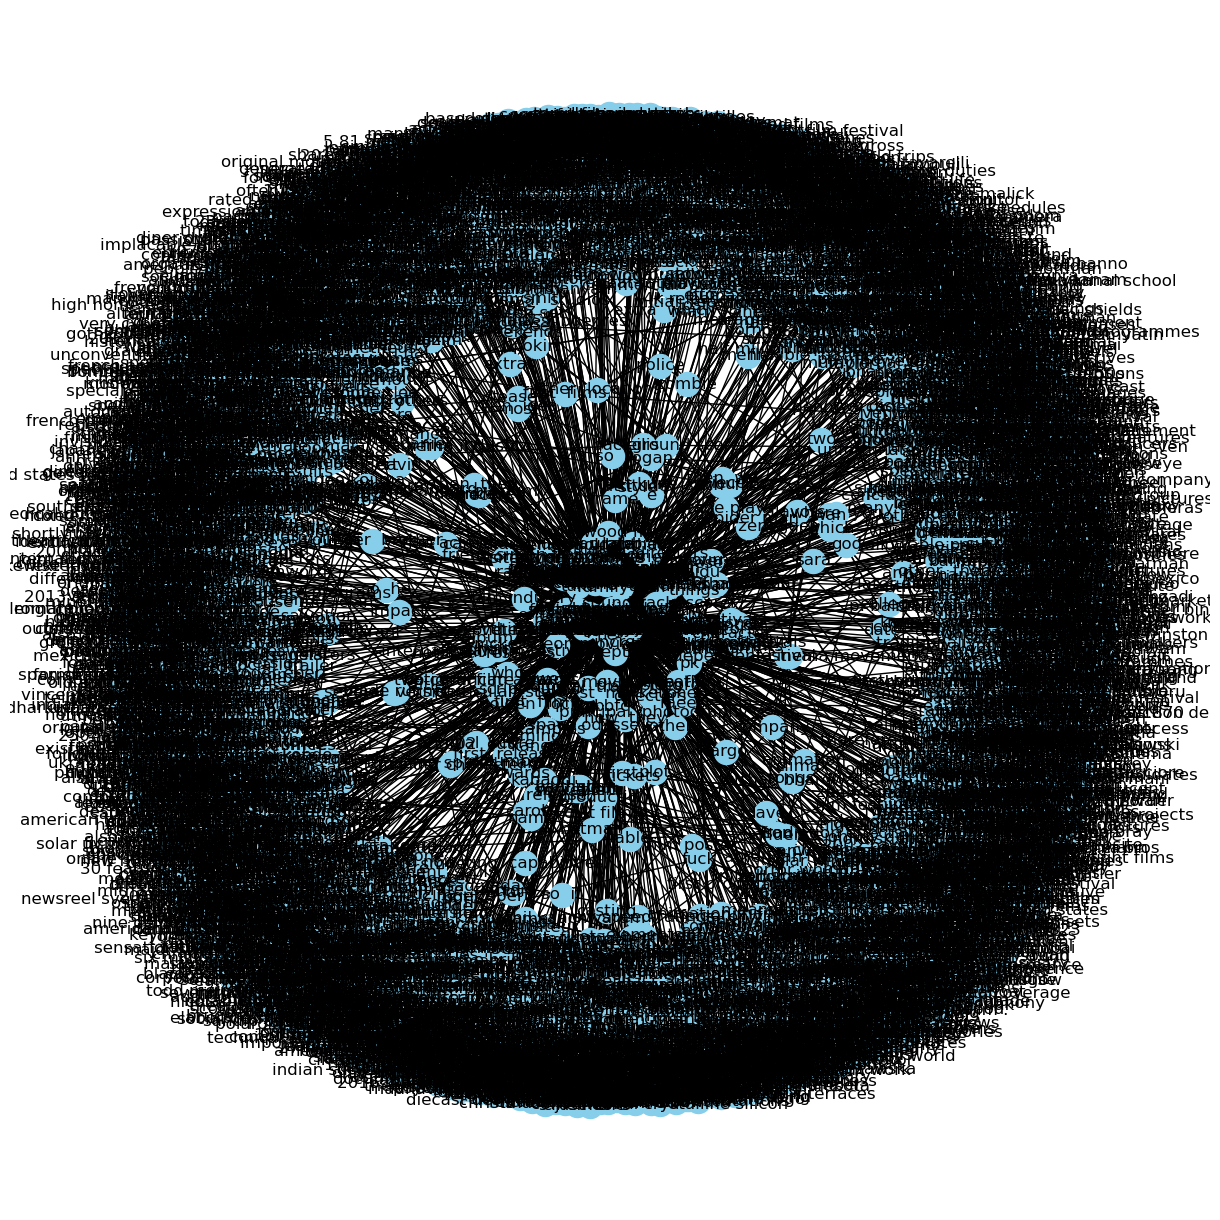

In [24]:
# 그래프 그리기
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G,with_labels=True, node_color='skyblue', edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

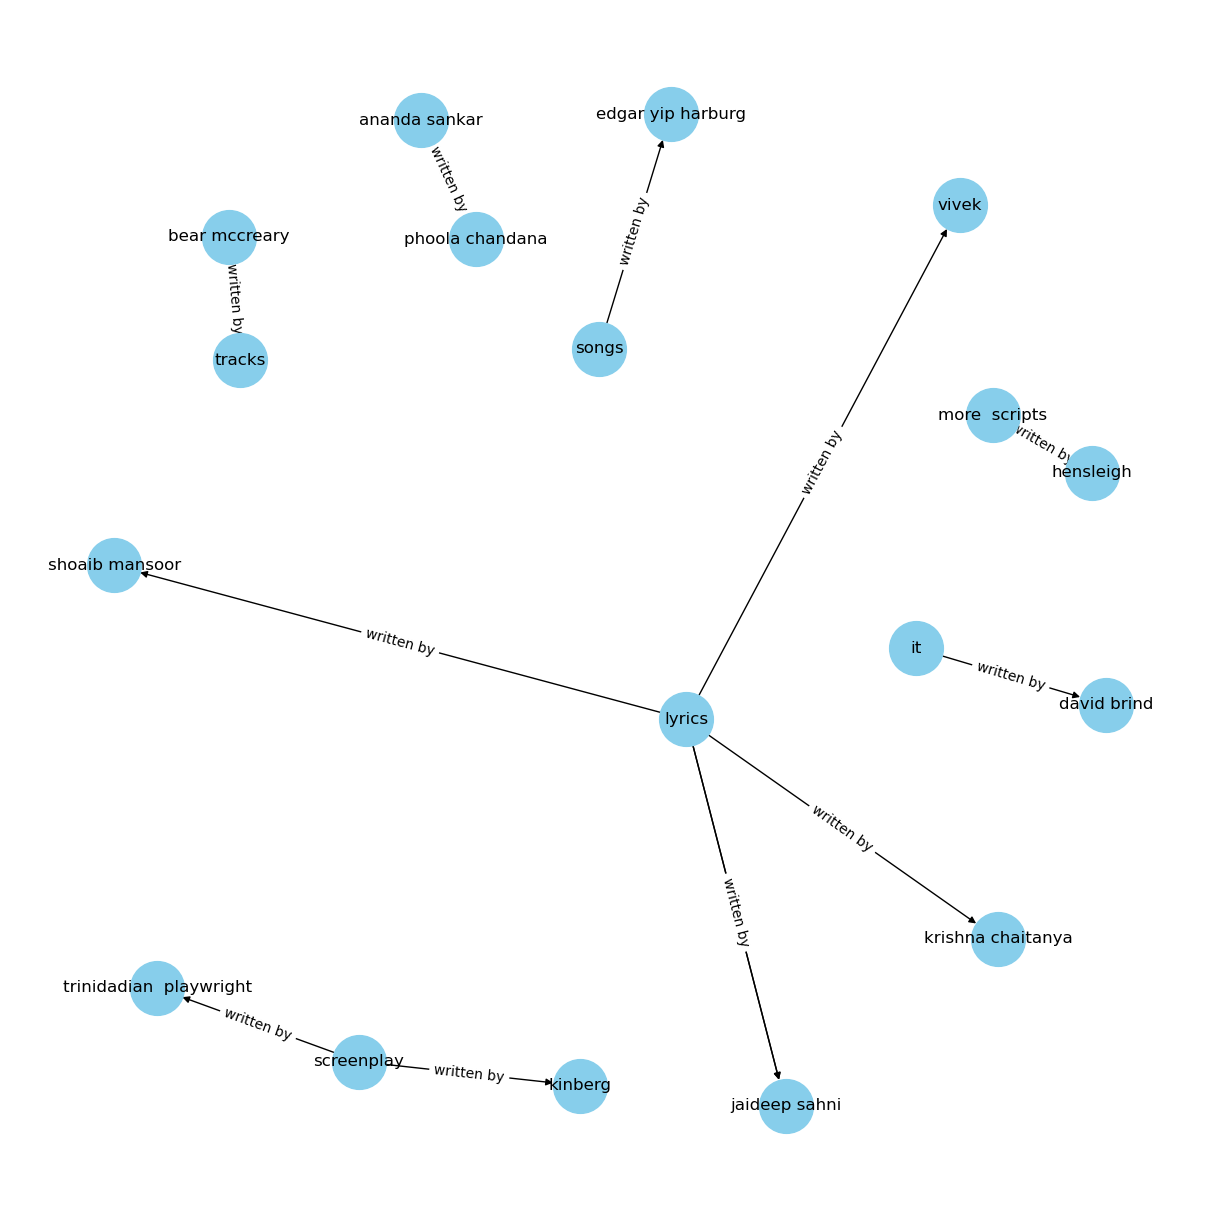

In [28]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="written by"], "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(row['source'], row['target']): row['edge'] for idx, row in kg_df.iterrows() if row['edge'] == 'written by'})
plt.show()

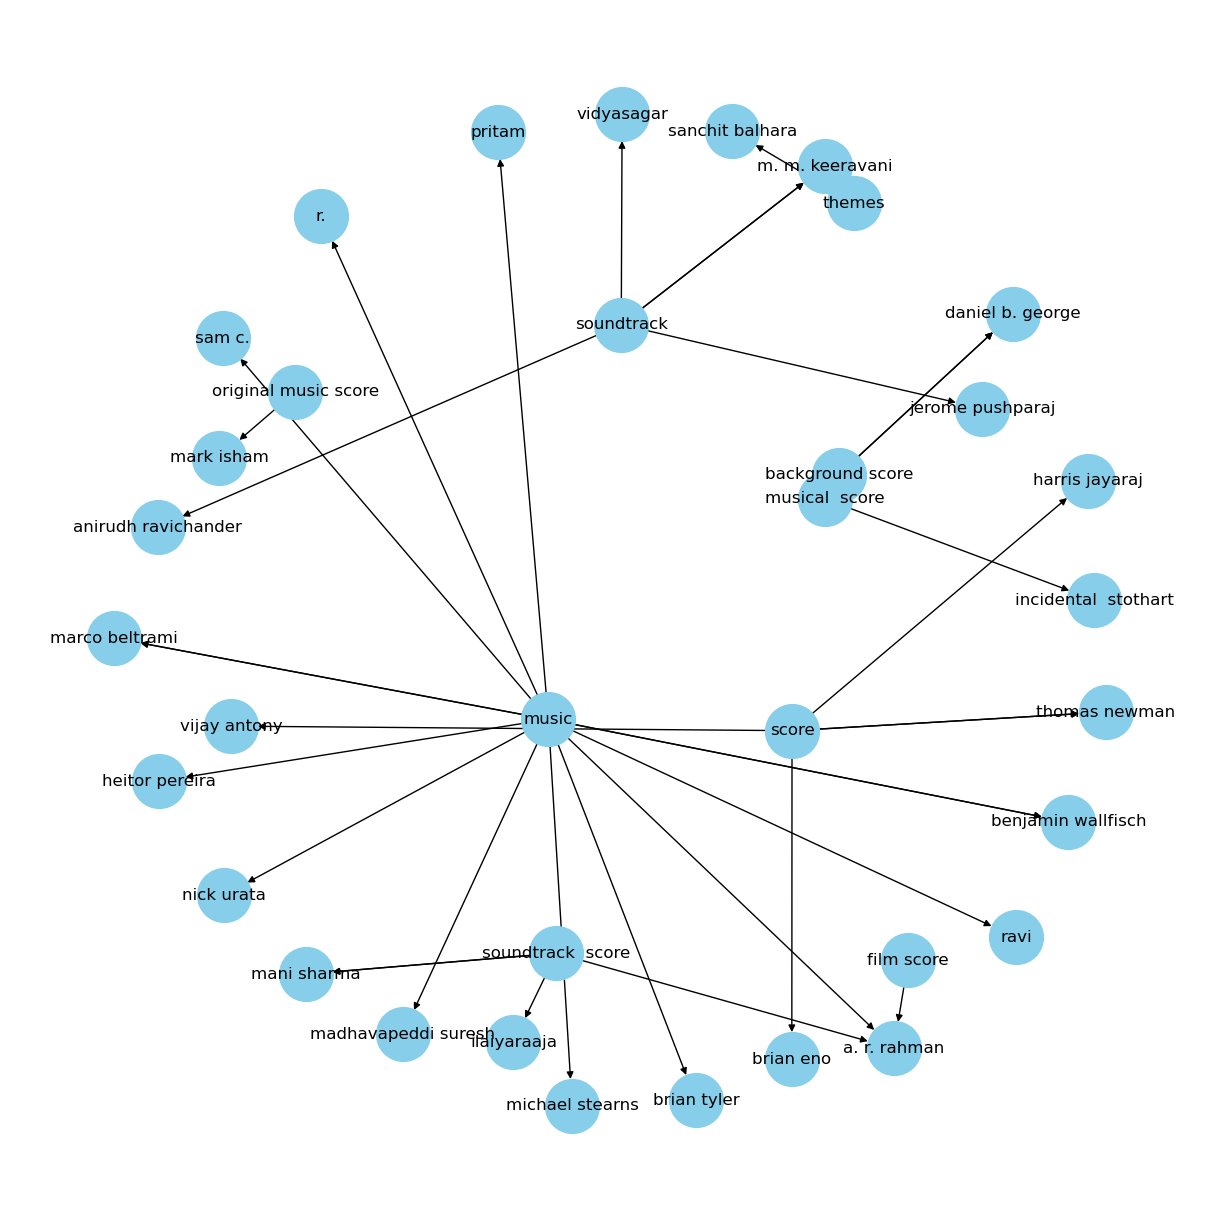

In [29]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G, k =0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color = 'skyblue', node_size=1500, edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

In [36]:
# written_by나 composed_by가 아닌 2개의 관계를 선택하기 위해
#nx.from_pandas_edgelist 함수에 전달되는 엣지 리스트 출력
edge_list = kg_df[['source', 'target', 'edge']].values.tolist()
print(edge_list)

[['connie', 'own', 'decides'], ['later  scream', 'distance', 'heard in'], ['christian', 'then  elder', 'paralyzed by'], ['temple', 'fire', 'set on'], ['', 'outside cult him', 'wails with'], ['it', 'religious  awakening', "'s"], ['c. mackenzie', 'craig cast', 'joined'], ['later craig di francia', 'action cast', 'revealed'], ['sebastian  maniscalco', 'later paul ben cast', 'revealed as'], ['we', 'just  film', 'tried'], ['we', 'tests', 'went through'], ['m', 'international sales rights', 'circling'], ['canadian musician robbie robertson', 'soundtrack', 'supervised'], ['it', 'original music tracks', 'features'], ['it', 'reviewed  franchise', 'is'], ['she', 'accidentally  mystique', 'injures'], ['military  forces', 'arrest', 'tasked with'], ['train', 'vuk', 'attacked by'], ['kota eberhardt', 'telepath selene gallio', 'portrays'], ['singer', 'men', 'return'], ['last  which', 'penn', 'stand'], ['jessica chastain', 'same  character', 'considered for'], ['mauro fiore', 'cinematographer', 'serve

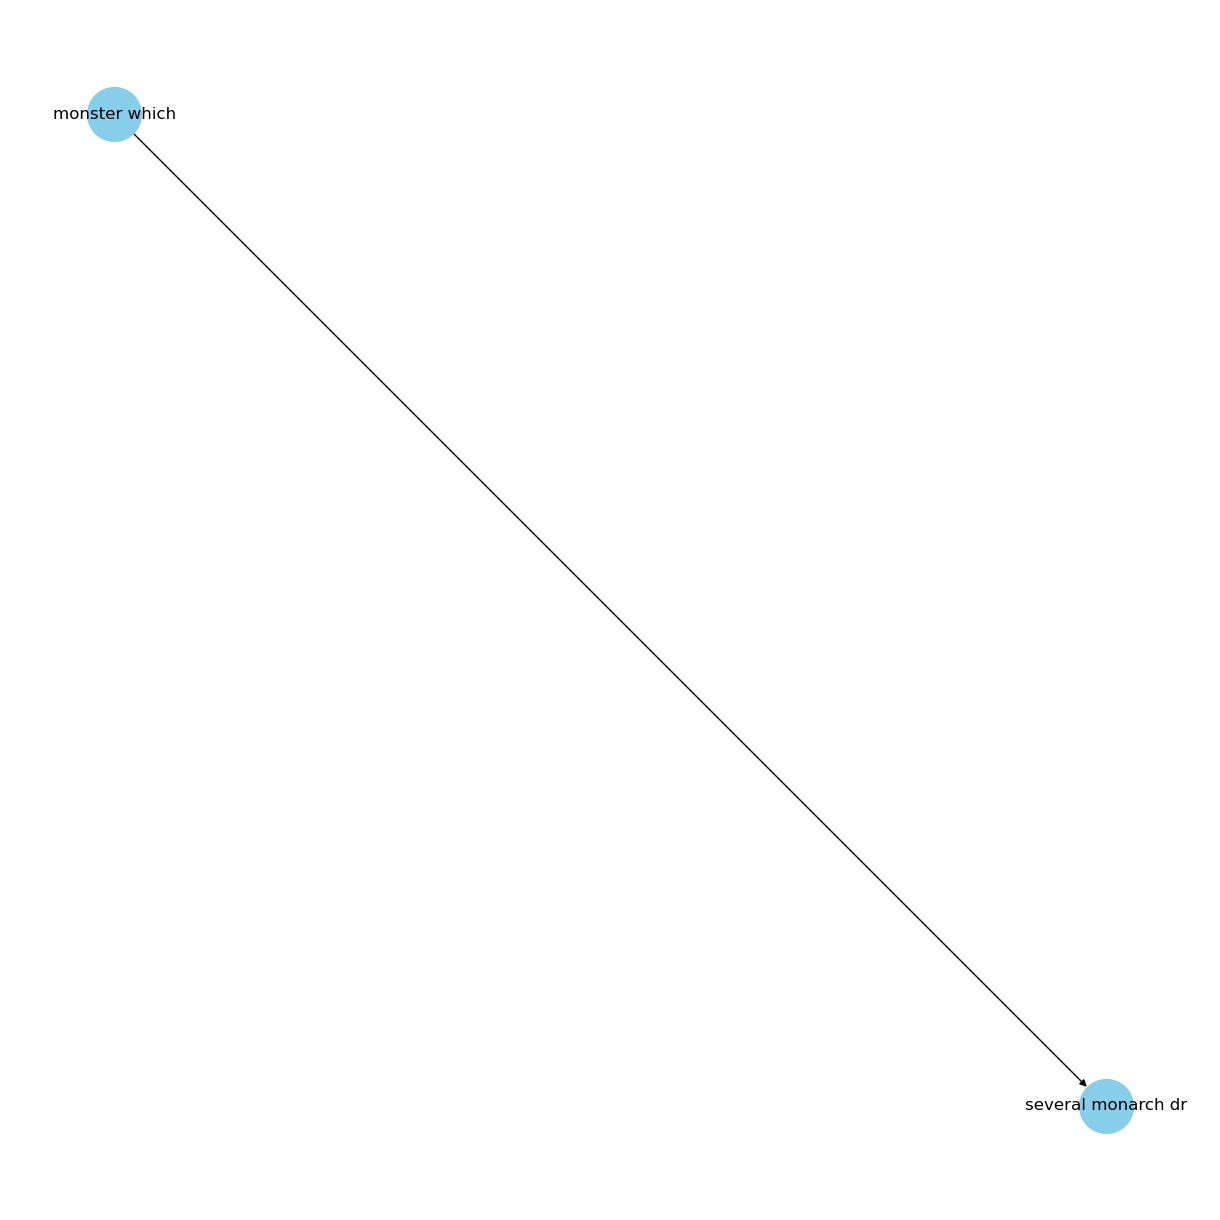

In [38]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="frees"], "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G, k =0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color = 'skyblue', node_size=1500, edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

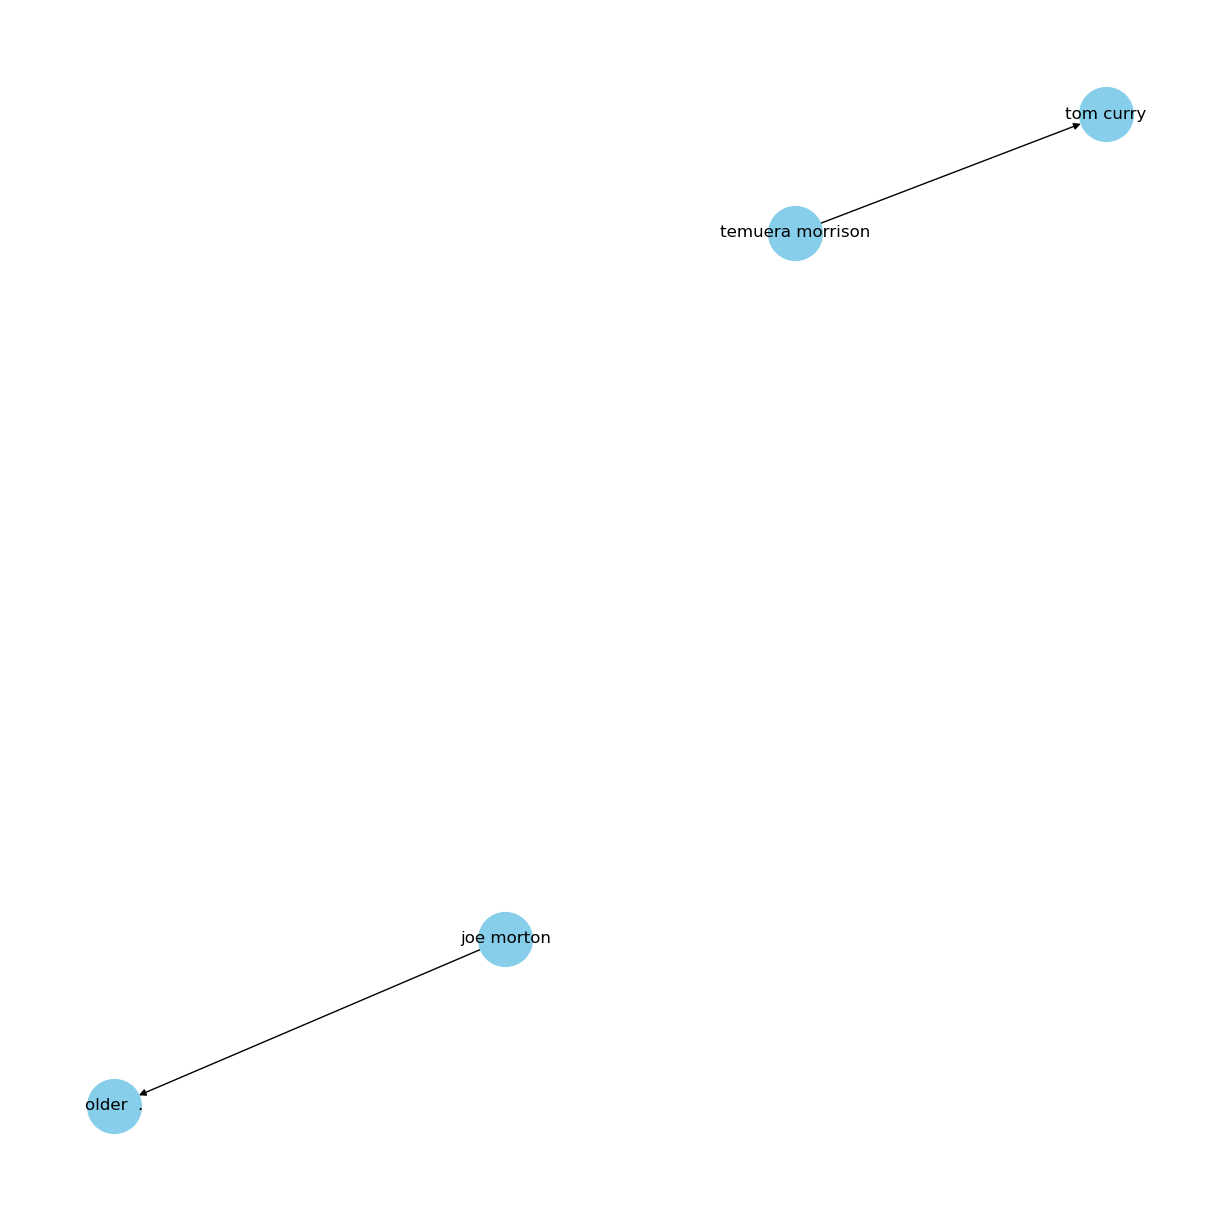

In [40]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="appears as"], "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G, k =0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color = 'skyblue', node_size=1500, edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

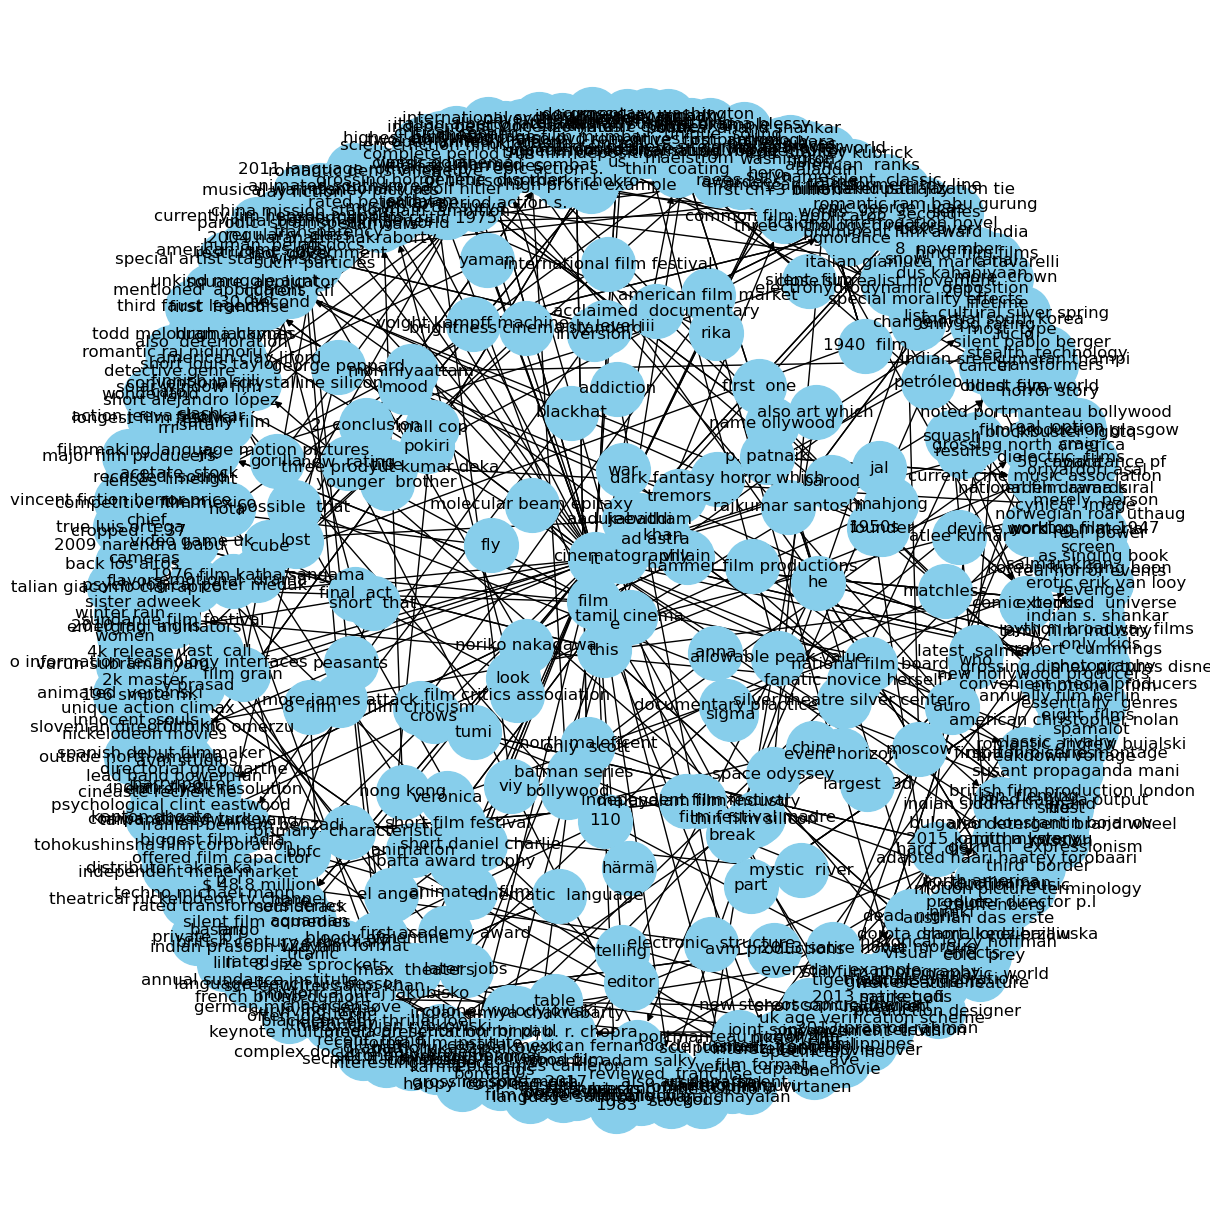

In [42]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="is"], "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G, k =0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color = 'skyblue', node_size=1500, edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

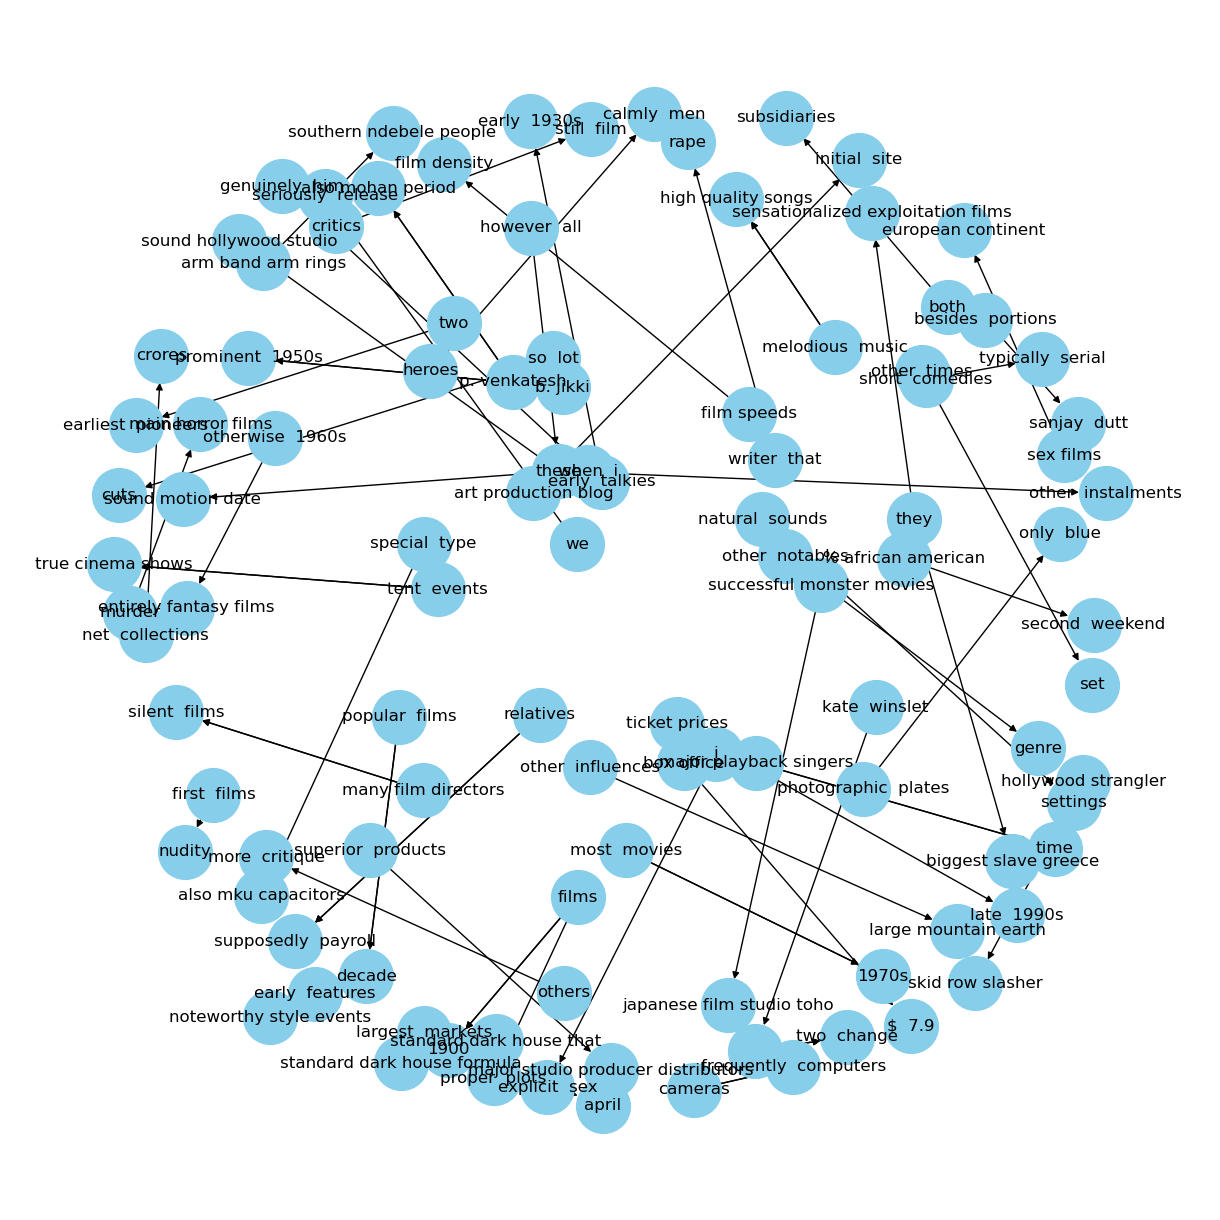

In [43]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="were"], "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G, k =0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color = 'skyblue', node_size=1500, edge_cmap = plt.cm.Blues, pos=pos)
plt.show()

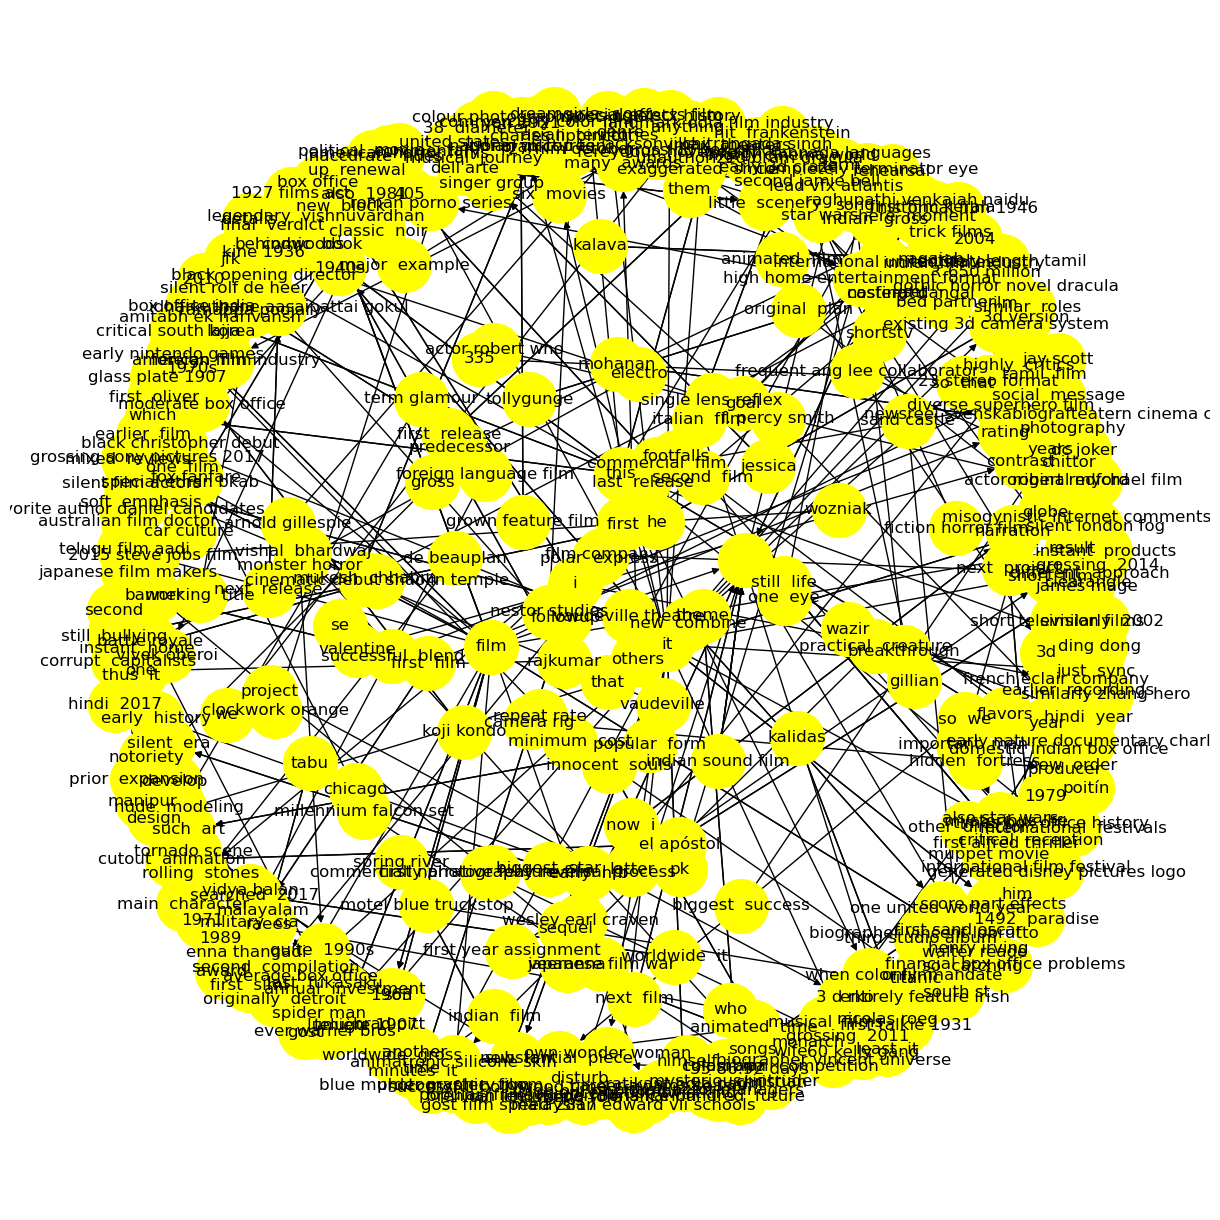

In [45]:
G = nx.from_pandas_edgelist(kg_df[kg_df['edge']=="was"], "source","target",
                            edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G, k =0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color = 'yellow', node_size=1500, edge_cmap = plt.cm.Blues, pos=pos)
plt.show()